# This notebook solves the Huggett Model (1993) using Dolo.

In [1]:
# First import the packages
Pkg.dir("Dolo")
import Dolo
using AxisArrays
using PyPlot

. To use SymEngine call Pkg.add("SymEngine")


In [191]:
# get the model file
filename=("huggett_1993.yaml")

"huggett_1993.yaml"

In [192]:
# Convert the file into Dolo model
model=Dolo.yaml_import(filename)

Model 


MethodError: MethodError: no method matching sanitize(::Expr, ::Dolo.Model{Symbol("##402")})[0m
Closest candidates are:
  sanitize(::Expr, [1m[31m::Array{Symbol,1}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:14
  sanitize(::Any, [1m[31m::Array{Symbol,1}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:3
  sanitize(::Any, [1m[31m::Dolo.SModel{ID}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:32[0m

The characteristics of the AR1 process for income are:

In [201]:
#The process has a mean : 
print(model.exogenous.mu)
# and a standard deviation: 
print(sqrt(model.exogenous.Sigma))
# and persistence parameter:
print(sqrt(model.exogenous.R))

[0.0][0.01][0.921954]

Simulate the AR1 process.

In [5]:
# Choose number of simulations, N, and number of simulated periods, T.
N=50
T = 1000

# simulate the process 
simAR = Dolo.simulate(model.exogenous,N,T);

Let's plot the simulated AR1 process.

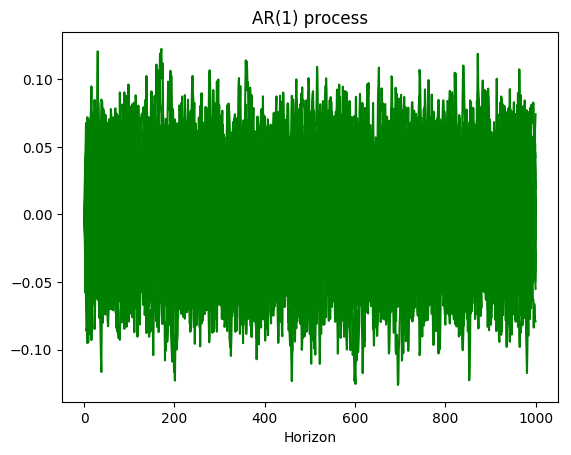

In [6]:
import PyPlot
plt=PyPlot
hor= linspace(1, T, T)
for i in 1:size(simAR,2)
    plt.plot(hor, vec(simAR[:,i,:]), color="green")
end

plt.xlabel("Horizon");
plt.title("AR(1) process");

Now let's look at solving the model. We will use Dolo's time iteration function (which iterates on the residuals of the arbitrage equation).

In [193]:
@time sol=Dolo.time_iteration(model,verbose=false, maxit=1000, details=true)
dr=sol.dr
@time res = Dolo.time_iteration(model, dr; maxit=200, details=true)

  3.524117 seconds (12.21 M allocations: 916.910 MB, 5.54% gc time)
It    SA          gain        nit  
-----------------------------------
0     1.79e-02    NaN         0    
1     0.00e+00    0.00e+00    0    
  0.554857 seconds (459.72 k allocations: 18.343 MB, 1.16% gc time)


Results of Time Iteration Algorithm
 * Complementarities: true
 * Decision Rule type: Dolo.TimeIterationResult
 * Number of iterations: 1
 * Convergence: true
   * |x - x'| < 1.0e-08: true


Dolo tabulate gives us the decision rules.

In [194]:
drtab = Dolo.tabulate(model, dr, :s) 

2-dimensional AxisArray{Float64,2,...} with axes:
    :V, Symbol[:lny,:s,:a]
    :s, [-2.0,-1.77778,-1.55556,-1.33333,-1.11111,-0.888889,-0.666667,-0.444444,-0.222222,0.0  …  18.0,18.2222,18.4444,18.6667,18.8889,19.1111,19.3333,19.5556,19.7778,20.0]
And data, a 3×100 Array{Float64,2}:
  0.0          0.0         0.0        …   0.0       0.0        0.0     
 -2.0         -1.77778    -1.55556       19.5556   19.7778    20.0     
  1.6263e-19  -0.0143197  -0.0284085     -0.42648  -0.428992  -0.431501

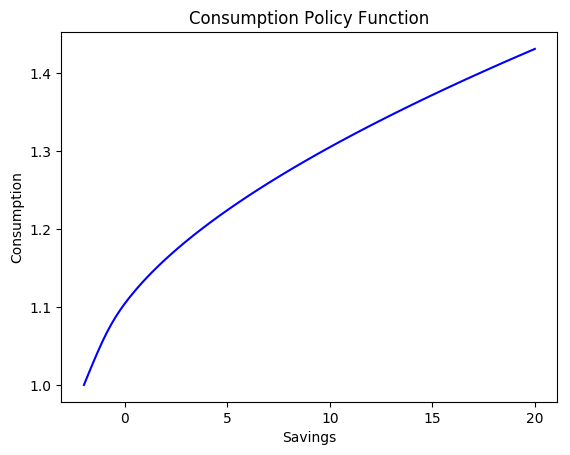

PyObject <matplotlib.text.Text object at 0x0000000031AD3F98>

In [195]:
# Plot the consumption policy function
c=exp(drtab[Axis{:V}(:lny)])+drtab[:s]*0.0000002-drtab[Axis{:V}(:a)]

plt.plot(drtab[Axis{:V}(:s)],c, color="blue")
plt.xlabel("Savings")
plt.ylabel("Consumption")
plt.title("Consumption Policy Function")

Now we simulate the model. We do 100 simulations, each for $T=100$ periods.

In [199]:
T=51
hor=linspace(1,T,T)
ii=2

2

### Simulations

Here are plots for the simulations. We see that the agent's consumption is equal to his income, as to be expected, since we are in a one-agent economy.

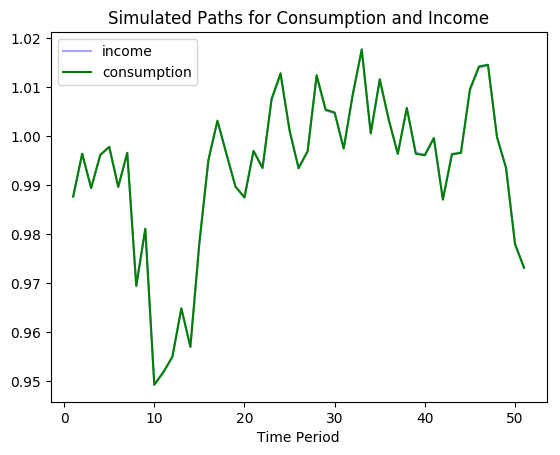

PyObject <matplotlib.text.Text object at 0x0000000031D8C0B8>

In [200]:
# Simulations
import PyPlot
plt=PyPlot
mc_ar=model.exogenous
sim_armc = Dolo.simulate(model,dr;N=10,T=900)
c=exp(sim_armc[Axis{:N}(ii), Axis{:V}(:lny)])[850:900]+sim_armc[Axis{:N}(ii), Axis{:V}(:s)][850:900]*0.000002-sim_armc[Axis{:N}(ii), Axis{:V}(:a)][850:900]
plt.plot(hor, exp(sim_armc[Axis{:N}(ii), Axis{:V}(:lny)])[850:900],color="blue", alpha=0.35, label="income")
plt.plot(hor, c, color="green",label="consumption")
plt.legend()
plt.xlabel("Time Period")
plt.title("Simulated Paths for Consumption and Income")